# Capstone Project 2 - Data Wrangling and Exploring

The dataset we will be using for the project is called the Toxic Comment Challenge from Kaggle. This is a competition in 2017 aiming to classify Wikipedia comments as one of the 6 categories: toxic, severe_toxic, obscene, threat, insult, identity_hate. This is a multi-label classification problem as we can have more than 1 label for one comment.

## Dataset Import and Visualisation

In [1]:
#Import the necessary modules
import pandas as pd
import string
from string import digits
import os
import re
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

In [2]:
#import the training data
traindata = pd.read_csv('train.csv', index_col = 0)

In [3]:
testdata = pd.read_csv('test.csv', index_col = 0)

In [4]:
traindata

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0


In [5]:
testdata

,comment_text
id,
00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
0000247867823ef7,== From RfC == \n\n The title is fine as it is...
00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
00017563c3f7919a,":If you have a look back at the source, the in..."
00017695ad8997eb,I don't anonymously edit articles at all.
...,...
fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."


We have 159,571 comments in the traindata and 153,164 comments in the testdata.

<b>Checking for null values</b>

In [6]:
print("Checking for null values in the Train set")
null_check=traindata.isnull().sum()
print(null_check)
print("Checking for null value in the Test set")
null_check=testdata.isnull().sum()
print(null_check)

Checking for null values in the Train set
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64
Checking for null value in the Test set
comment_text    0
dtype: int64


As expected, since this is a Kaggle contest data, there is not any null value in either sets.

Now we will have a look at the number of comments that are actually clean (free of toxic material)

In [7]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159571 entries, 0000997932d777bf to fff46fc426af1f9a
Data columns (total 7 columns):
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(1)
memory usage: 9.7+ MB


In [8]:
counttoxic = traindata[['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

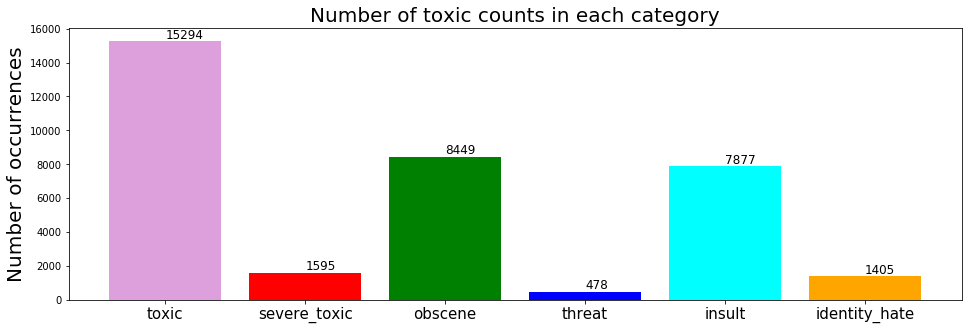

In [9]:
plt.figure(figsize=(16,5))
plt.bar(counttoxic.columns, counttoxic.sum(), color=['plum', 'red', 'green', 'blue', 'cyan', 'orange'])
plt.title('Number of toxic counts in each category', fontsize=20)
plt.ylabel('Number of occurrences', fontsize=20)
xlocs=plt.xticks(fontsize=15)
for i, v in enumerate(counttoxic.sum()):
    plt.text(s= str(v), x = i, y=v+150, fontsize=12)
plt.show()

<b>Create a new column for clean comments</b>

In [10]:
#The clean comment will be the one where it does not belong to any of the 6 categories
traindata['clean'] = 1 - traindata[traindata.columns[1:]].max(axis =1)
traindata.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
id,,,,,,,,
0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1


In [11]:
counttoxic2 = traindata[['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'clean']]

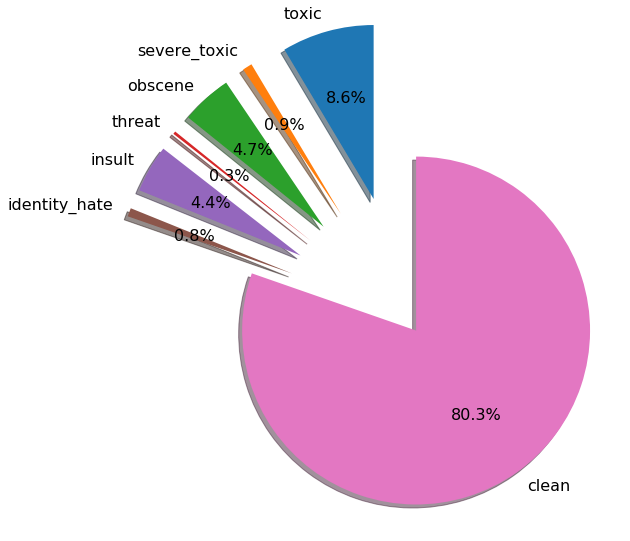

In [12]:
explode = (0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.1)
plt.figure(figsize=(16,8))
plt.pie(counttoxic2.sum(), explode = explode, labels=counttoxic2.columns, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 16})
plt.show()

<b>Checking the Correlation between features<b>

As we can see, the 7 feature variables (including clean) are dichotomous categorical variables (with values as either 0 or 1) so we can apply the Pearson correlation (also known as point-biserial correlation coefficient) in this case. We will do a correlation heatmap in order to look at the correlation between these variables.

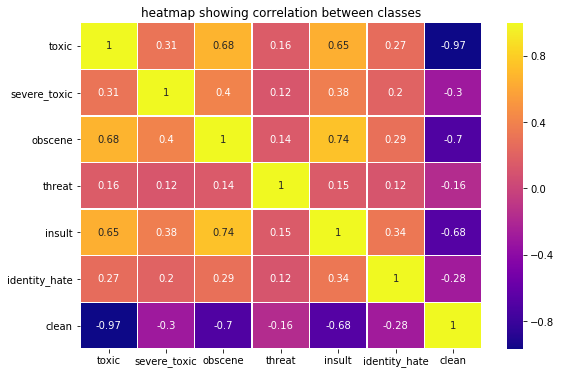

In [13]:
#Finding the correlation between feature variables
y = traindata.corr()
colormap = plt.cm.plasma
plt.figure(figsize=(9,6))
sns.heatmap(y,annot=True,linewidths=.5, cmap=colormap)
plt.title('heatmap showing correlation between classes')
plt.show()

Notice the .corr() formula simply ignore the comment_text variable as it is a non-numerical variable

 - There is high correlation between clean and toxic (negatively correlated) suggesting that the comments are likely to be classified as either toxic or clean
 - obscene and insult categories also have high correlation with toxic (0.68 and 0.65 respectively). Perhaps we can explore further with a Venn diagram to see

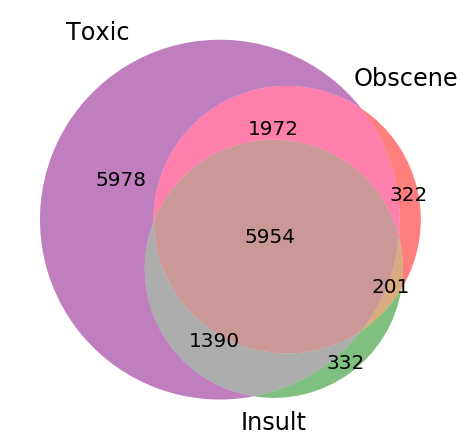

In [34]:
from matplotlib_venn import venn3
#We use the library for venn diagrams in order to visualize the correlation of these 3 categories
#We need to create little subsets of values corresponding to overlapping values
Set1 = len(traindata[(traindata['toxic']==1) & (traindata['obscene']==0) & (traindata['insult']==0)])
Set2 = len(traindata[(traindata['toxic']==0) & (traindata['obscene']==1) & (traindata['insult']==0)])
Set3 = len(traindata[(traindata['toxic']==1) & (traindata['obscene']==1) & (traindata['insult']==0)])
Set4 = len(traindata[(traindata['toxic']==0) & (traindata['obscene']==0) & (traindata['insult']==1)])
Set5 = len(traindata[(traindata['toxic']==1) & (traindata['obscene']==0) & (traindata['insult']==1)])
Set6 = len(traindata[(traindata['toxic']==0) & (traindata['obscene']==1) & (traindata['insult']==1)])
Set7 = len(traindata[(traindata['toxic']==1) & (traindata['obscene']==1) & (traindata['insult']==1)])
#Drawing the Venn diagram based on the data
plt.figure(figsize=(8, 8))
diagram = venn3(subsets = (Set1, Set2, Set3, Set4, Set5, Set6, Set7), 
      set_labels = ('Toxic', 'Obscene', 'Insult'),set_colors=('purple', 'red', 'green'), alpha = 0.5);
for text in diagram.set_labels:
    text.set_fontsize(24)
for text in diagram.subset_labels:
    text.set_fontsize(20)

It is interesting to note here that: 
 - The majority of comments classified as obscene are also classified as toxic (1972 + 5954 = 7926 comments out of 8449 obscene comments which is roughly 93.8%) 
 - and the majority of comments classified as insult are also classified as toxic (5954+1390=7344 comments out of the 7877 insult comments which is roughly 93.2%)
 - 5954 comments are classified as obscene, insult and toxic

<b>Checking the number of classification per comment</b>

In [15]:
traindata['Number of labels'] = traindata['toxic']+traindata['severe_toxic']+ traindata['obscene']+ traindata['threat']+ traindata['insult'] + traindata['identity_hate']

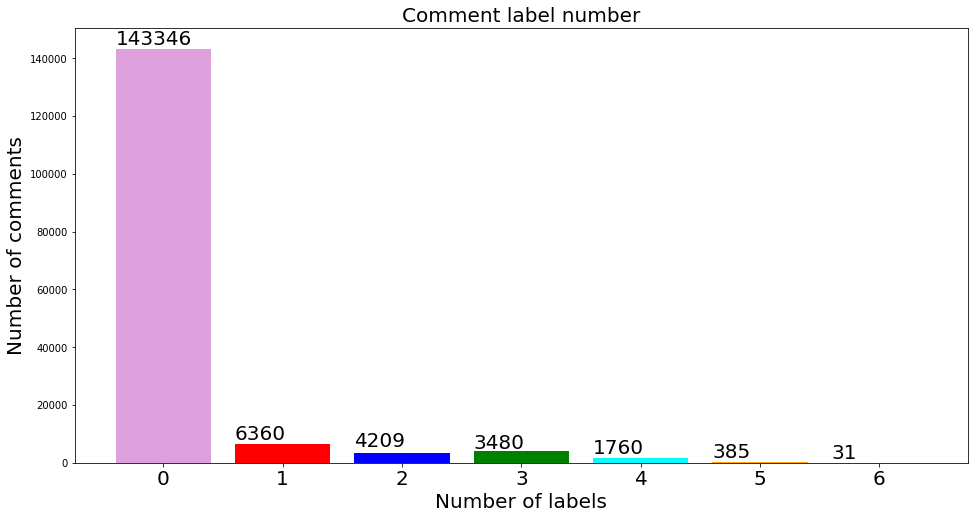

In [16]:
labelnumber = traindata['Number of labels'].value_counts()
plt.figure(figsize=(16,8))
plt.bar(labelnumber.index.values, labelnumber, color=['plum', 'red', 'green', 'blue', 'cyan', 'orange', 'indigo'])
plt.title('Comment label number',fontsize=20)
plt.ylabel('Number of comments',fontsize=20)
plt.xlabel('Number of labels',fontsize=20)
xlocs=plt.xticks(fontsize=20)
for i, v in enumerate(labelnumber):
    plt.text(s= str(v), x = i-0.4, y=v+1500, fontsize=20)
plt.show()

In [17]:
traindata.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,Number of labels
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.898321,0.219952
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226,0.748260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


## Data Cleaning

<b>Combining the comment from traindata and testdata for text cleaning<b>

In [18]:
#Extracting comment_text from the traindata
train_comments = traindata['comment_text']
#Extracting comment_text from the traindata
test_comments = testdata['comment_text']
#saving the index for later separation
train_comments_index = train_comments.index
test_comments_index = test_comments.index

In [19]:
#concat the train comments and the test comments for text cleaning
frames = [train_comments, test_comments]
comments = pd.concat(frames)

In [20]:
#Removing the punctuation:
comments=comments.str.translate(str.maketrans(' ', ' ', string.punctuation))
#Removing the \n in the comments
comments=comments.str.translate(str.maketrans(' ', ' ', '\n'))
#removing the digits in the comments
comments=comments.str.translate(str.maketrans(' ', ' ', digits))
#Splitting combined words
comments=comments.apply(lambda tweet: re.sub(r'([a-z])([A-Z])',r'\1 \2',tweet))
#Converting words into lowercase
comments=comments.str.lower()

In [21]:
#tokenize comments
comments = comments.apply(word_tokenize)

In [22]:
#Setting stopwords
stop = set(stopwords.words('english'))
#removing stopwords
comments = comments.apply(lambda x: [item for item in x if item not in stop])
comments.head() 

id
0000997932d777bf    [explanation, edits, made, username, hardcore,...
000103f0d9cfb60f    [daww, matches, background, colour, im, seemin...
000113f07ec002fd    [hey, man, im, really, trying, edit, war, guy,...
0001b41b1c6bb37e    [cant, make, real, suggestions, improvement, w...
0001d958c54c6e35           [sir, hero, chance, remember, page, thats]
Name: comment_text, dtype: object

In [23]:
#Converting words in base form/lemmatize
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]
comments = comments.apply(lemmatize_text)

In [24]:
#Split the data in clean training data and clean test data
train_clean_data=comments.loc[train_comments_index]
test_clean_data=comments.drop(train_comments_index,axis=0).reset_index(drop=True)

In [25]:
#Adding the original labels into the data
labels=traindata.iloc[:,1:]
train_result = pd.concat([train_clean_data,labels],axis=1)

In [26]:
train_result

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,Number of labels
id,,,,,,,,,
0000997932d777bf,"[explanation, edits, made, username, hardcore,...",0,0,0,0,0,0,1,0
000103f0d9cfb60f,"[daww, match, background, colour, im, seemingl...",0,0,0,0,0,0,1,0
000113f07ec002fd,"[hey, man, im, really, trying, edit, war, guy,...",0,0,0,0,0,0,1,0
0001b41b1c6bb37e,"[cant, make, real, suggestion, improvement, wo...",0,0,0,0,0,0,1,0
0001d958c54c6e35,"[sir, hero, chance, remember, page, thats]",0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
ffe987279560d7ff,"[second, time, asking, view, completely, contr...",0,0,0,0,0,0,1,0
ffea4adeee384e90,"[ashamed, horrible, thing, put, talk, page]",0,0,0,0,0,0,1,0
ffee36eab5c267c9,"[spitzer, umm, there, actual, article, prostit...",0,0,0,0,0,0,1,0


<b>Generating Word Cloud for each categories of toxicity<b>

In [27]:
#Generating WordCloud
wc = WordCloud()

In [28]:
from collections import Counter
#Create a dictionary of word frequency count in each of the toxic labels
word_frequency = {}
labelnames = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
#Looping over 
for label in labelnames:
    d=Counter()
    train_result[train_result[label]==1]['comment_text'].apply(lambda t: d.update(t))
    word_frequency[label] = pd.DataFrame.from_dict(d, orient='index').rename(columns={0: 'count'}).sort_values('count', ascending=False)

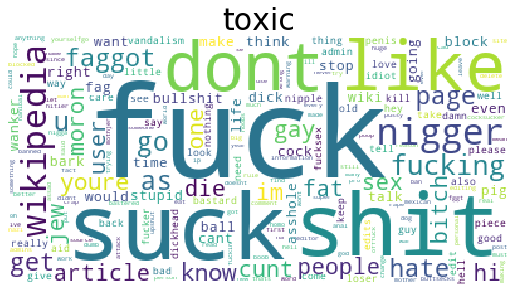

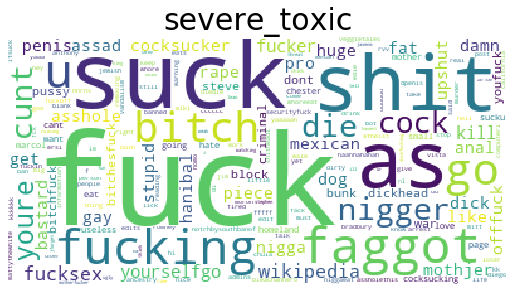

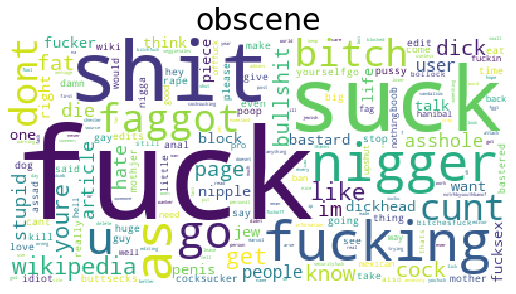

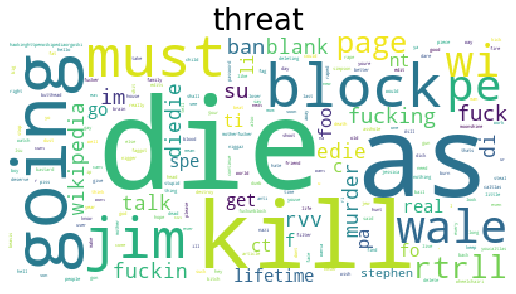

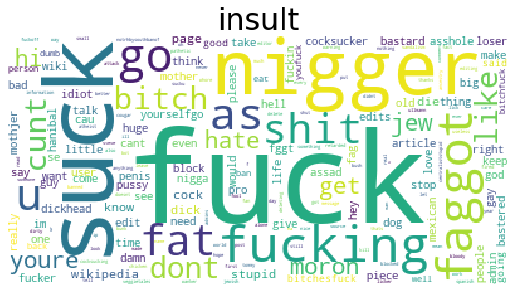

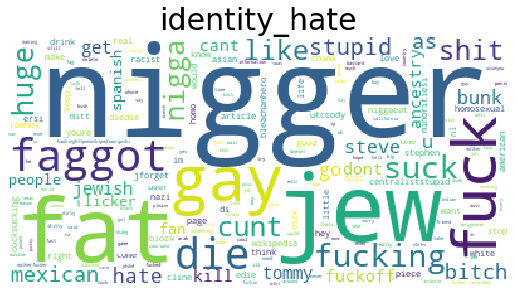

In [29]:
#Create Word Cloud for each category
for labelcount in word_frequency:
    lc = word_frequency[labelcount]

    wordcloud = WordCloud(
          background_color='white',
          max_words=200,
          max_font_size=100, 
         ).generate_from_frequencies(lc.to_dict()['count'])

    fig = plt.figure(figsize=(9, 6))
    plt.title(labelcount,fontsize=30)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()